In [40]:
import pydicom
from pathlib import Path
import re

loc = '/run/media/anton/Elements/UKB/20204/Bulk/Liver MRI/ShMOLLI/12/'
subs = []

for ent in Path(loc).iterdir():
    if not ent.is_dir():
        continue
    mtch = re.match('(\\d+)_20204_2_0', ent.name)
    if mtch:
        subs.append(mtch.group(1))

print(len(subs))

1668


In [41]:
sub_dcms = dict()

for i,sub in enumerate(subs):
    dcm_paths = []
    for ent in Path(f'{loc}/{sub}_20204_2_0').iterdir():
        if re.match('.*\\.dcm$', ent.name):
            dcm_paths.append(ent)
            
    dcms = []
    for path in dcm_paths:
        d = pydicom.dcmread(path)
        dcms.append(d)
        
    series_numbers = set()
    for dcm in dcms:
        series_numbers.add(int(dcm.SeriesNumber))
    series_numbers = sorted(list(series_numbers))

    first_dcms = []
    for dcm in dcms:
        if int(dcm.SeriesNumber) == series_numbers[0]:
            first_dcms.append(dcm)

    first_dcms.sort(key=lambda dcm: int(dcm.InstanceNumber))

    for dcm in dcms:
        if int(dcm.SeriesNumber) == series_numbers[0] and int(dcm.InstanceNumber) == 1:
            sub_dcms[sub] = dcm.pixel_array

    if i % 50 == 0:
        print(f'Done {i}')

Done 0
Done 50
Done 100
Done 150
Done 200
Done 250
Done 300
Done 350
Done 400
Done 450
Done 500
Done 550
Done 600
Done 650
Done 700
Done 750
Done 800
Done 850
Done 900
Done 950
Done 1000
Done 1050
Done 1100
Done 1150
Done 1200
Done 1250
Done 1300
Done 1350
Done 1400
Done 1450
Done 1500
Done 1550
Done 1600
Done 1650


In [42]:
print(len(sub_dcms))

1668


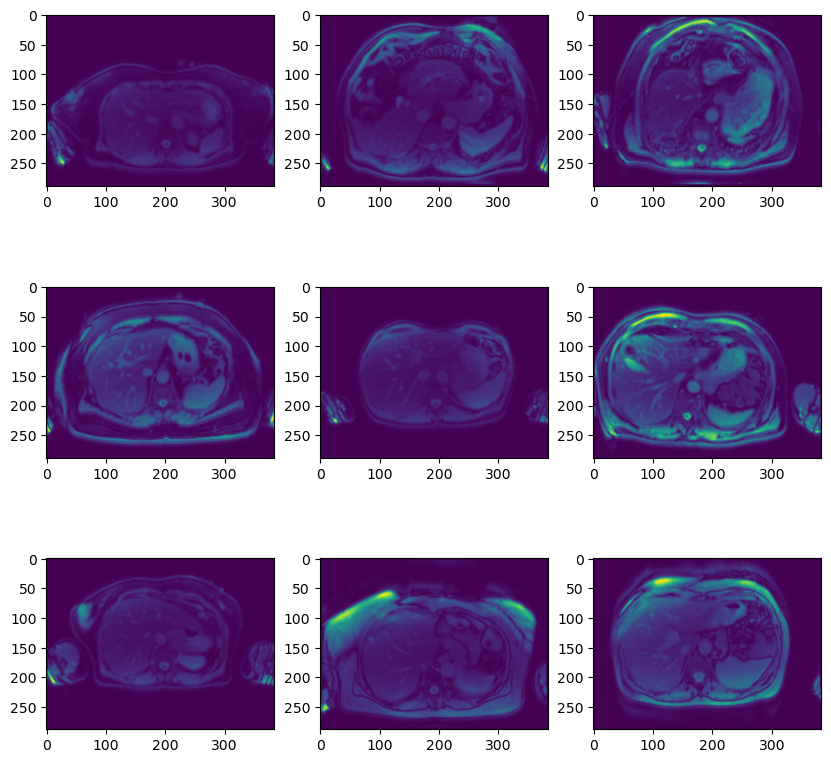

In [43]:
import matplotlib.pyplot as plt
import math

fig, ax = plt.subplots(3,3,figsize=(10,10))

keys = list(sub_dcms.keys())
start_idx = 200

for i in range(9):
    c = i % 3
    r = math.floor(i/3)
    ax[r,c].imshow(sub_dcms[keys[start_idx+i]])

In [44]:
import numpy as np

# In 11 there are 3 bad subjects - some with different FOV MRI and one with bad values

selected_dcms = dict()

for sub,dcm in sub_dcms.items():
    if dcm.shape != (288, 384) or np.any(np.isnan(dcm)):
        print(dcm.shape)
    elif sub == '1134058':
        print(dcm.shape)
    else:
        selected_dcms[sub] = dcm

print('All equal')
print(len(selected_dcms))

(316, 384)
All equal
1667


In [45]:
import pickle

pickle.dump(selected_dcms, open('/run/media/anton/Elements/UKB/liver12.pkl', 'wb'))

print('Done')

Done
